In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [15]:
np.random.seed(2)

In [26]:
m       = 4  # Number of classes
d       = 2  # Input dimensionality
train_n = 50  # Training set size
test_n  = 25  # Test set size

# Generate data with three classes
X, y = make_classification(n_samples      = test_n + train_n,
                           n_features    = d,
                           n_informative = d,
                           n_redundant   = 0,
                           n_repeated    = 0,
                           n_classes     = m,
                           n_clusters_per_class = 1,
                           weights      = None,
                           flip_y        = 0.01,
                           class_sep    = 0.75,
                           hypercube    = True,
                           shift        = 0.0,
                           scale        = 1.0,
                           shuffle        = True,
                           random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_n, random_state=4711)

In [27]:
logreg = LogisticRegression(penalty = 'none',
                            fit_intercept = True,
                            multi_class = 'multinomial',
                            solver = 'lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', penalty='none')

In [93]:
# Get model parameters
ws = logreg.coef_
bs = logreg.intercept_
# Evaluate model
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)
print(f"Training accuracy: {train_score}\nTest accuracy: {test_score}")


Training accuracy: 0.74
Test accuracy: 0.72


In [49]:
# Colors for the three classes
colors = ['b', 'r', 'g', 'y']
class_colours = [colors[i] for i in y]
cmap = mpl.colors.ListedColormap(colors[:m])

# Compute the plot boundaries
xl, xh = np.floor(X[:,0].min() - 0.1), np.ceil(X[:,0].max() + 0.1)
yl, yh = np.floor(X[:,1].min() - 0.1), np.ceil(X[:,1].max() + 0.1)

# Create grid to calculate the decision boundary on
res = (xh - xl) / 300  # Resulution of the grid
xx, yy = np.meshgrid(np.arange(xl, xh, res), np.arange(yl, yh, res))

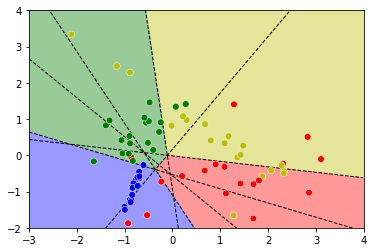

In [50]:
plt.xlim(xl, xh)
plt.ylim(yl, yh)

plt.figure(1)
ax = plt.gca()

# Classify each point on the grid
Z = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

# Plot points
ax.scatter(X[:,0], X[:,1], s=45, c=class_colours, edgecolor=plt.cm.gray(.95), lw=0.5, zorder=100)

# Plot classifications
cax = ax.matshow(Z, cmap=cmap, origin="lower", extent=[xl, xh, yl, yh], aspect="auto", alpha=.4)
ax.xaxis.set_ticks_position('bottom')
ax.grid(False)

for i in np.arange(m - 1):
    for j in np.arange(i + 1, m):
        w = ws[i] - ws[j]
        b = -(bs[i] - bs[j]) / w[1]
        a = -w[0] / w[1]
        x_line = np.arange(xl, xh, res)
        y_line = a * x_line + b
        ax.plot(x_line, y_line, "k", lw=1, ls='--')

plt.xlim(xl, xh)
plt.ylim(yl, yh)
plt.show()


# PyTorch

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [386]:
class LogisticRegressionPytorch(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionPytorch, self).__init__()
        # TODO: LAYER DEFINITION MISSING
        self.l1 = nn.Linear(input_dim, output_dim)
        
        # explicitly initialize weight and bias.
        #nn.init.xavier_uniform_(self.hidden1.weight)
        #nn.init.zeros_(self.hidden1.bias)
        #self.forward = lambda x: self.l1(x)
    def forward(self, x):
        # TODO: RETURN VALUE MISSING
        return self.l1(x)

logreg_pytorch = LogisticRegressionPytorch(d, m)
print(logreg_pytorch)

LogisticRegressionPytorch(
  (l1): Linear(in_features=2, out_features=4, bias=True)
)


In [387]:
X_train_T = torch.Tensor(X_train)
y_train_T = torch.from_numpy(y_train)

X_test_T = torch.Tensor(X_test)
y_test_T = torch.from_numpy(y_test)

In [388]:
optimizer = optim.Adam(logreg_pytorch.parameters(), lr = 0.02)
# TODO: DEFINITION OF LOSS FUNCTION MISSING
loss_f = F.cross_entropy

In [389]:

num_epochs = 40000  # Number of training steps
for epoch in range(num_epochs):
    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward + backward + optimize
    predictions = logreg_pytorch(X_train_T)
    # TODO: SOMETHING MISSING HERE
    loss = loss_f(predictions, y_train_T)
    
    # TODO: SOMETHING MISSING HERE
    loss.backward()
    optimizer.step()
    
    if epoch % 2000 == 0:
        with torch.no_grad():
            predictions = logreg_pytorch(X_test_T).detach().numpy().argmax(1)
            test_accuracy = (predictions == y_test).mean()
            print(f"Epoch {epoch}: test accuracy = {test_accuracy}")

Epoch 0: test accuracy = 0.32
Epoch 2000: test accuracy = 0.72
Epoch 4000: test accuracy = 0.72
Epoch 6000: test accuracy = 0.72
Epoch 8000: test accuracy = 0.72
Epoch 10000: test accuracy = 0.72
Epoch 12000: test accuracy = 0.72
Epoch 14000: test accuracy = 0.72
Epoch 16000: test accuracy = 0.72
Epoch 18000: test accuracy = 0.72
Epoch 20000: test accuracy = 0.72
Epoch 22000: test accuracy = 0.72
Epoch 24000: test accuracy = 0.72
Epoch 26000: test accuracy = 0.72
Epoch 28000: test accuracy = 0.72
Epoch 30000: test accuracy = 0.72
Epoch 32000: test accuracy = 0.72
Epoch 34000: test accuracy = 0.72
Epoch 36000: test accuracy = 0.72
Epoch 38000: test accuracy = 0.72


In [340]:
train_predictions = logreg_pytorch(X_train_T).detach().numpy().argmax(1)
train_accuracy = (train_predictions == y_train).mean()

test_predictions = logreg_pytorch(X_test_T).detach().numpy().argmax(1)
test_accuracy = (test_predictions == y_test).mean()

print(f"Training accuracy: {train_accuracy}\nTest accuracy: {test_accuracy}")

Training accuracy: 0.9
Test accuracy: 0.76


In [168]:
print(f"Weights:\n{ws}\nBiases:\n{bs}")

Weights:
[[-2.1944392  -2.18116341]
 [ 1.41283771 -0.36105617]
 [-0.89934198  1.1239456 ]
 [ 1.68094346  1.41827398]]
Biases:
[-1.44737652  0.55474302  0.30896602  0.58366748]


In [392]:
for name, param in logreg_pytorch.named_parameters():
    print(name, param.data)

l1.weight tensor([[-2.4371, -2.4753],
        [ 1.1705, -0.6541],
        [-1.1408,  0.8303],
        [ 1.4395,  1.1248]])
l1.bias tensor([-1.1784,  0.8224,  0.5765,  0.8524])


array([[ -7.372049 ,  -6.4597826],
       [  7.9115763,  -2.4530067],
       [ -3.766304 ,   8.5372505],
       [  7.308166 ,   5.5166907],
       [ 10.128338 ,  -1.0545875],
       [ 13.661272 ,   5.768243 ],
       [-18.27009  ,  -8.484608 ],
       [  1.9829205,  14.42122  ],
       [-10.457778 , -17.16858  ],
       [-17.880598 ,  -8.6282625],
       [ -9.471335 ,   1.0412233],
       [  9.2826805,  15.399661 ],
       [ -5.1522884, -18.151438 ],
       [ -3.5592976,  -1.1406112],
       [ 16.661636 ,   4.932246 ],
       [ 13.6777   ,   4.965747 ]], dtype=float32)

In [390]:
ws_torch = logreg_pytorch.l1.weight.detach().numpy()
# TODO: SOMETHING MISSING HERE
bs_torch = logreg_pytorch.l1.bias.detach().numpy()

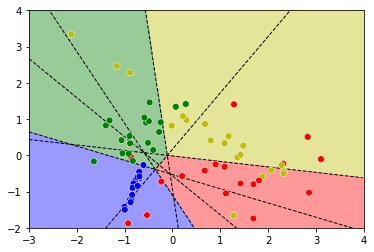

In [391]:
plt.figure(2)
ax = plt.gca()

# Classify each point on the grid
X_Z_T = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])  # Automatically casts to float
outputs = logreg_pytorch(X_Z_T)
_, predicted = torch.max(outputs.data, 1)

Z = predicted.numpy().reshape(xx.shape)

# Plot points
ax.scatter(X[:,0], X[:,1], s=45, c=class_colours, edgecolor=plt.cm.gray(.95), lw=0.5, zorder=100)

# Plot classifications
cax = ax.matshow(Z, cmap=cmap, origin="lower", extent=[xl, xh, yl, yh], aspect="auto", alpha=.4)
ax.xaxis.set_ticks_position('bottom')
ax.grid(False)

for i in np.arange(m - 1):
    for j in np.arange(i + 1, m):
        w = ws_torch[i] - ws_torch[j]
        b = bs_torch[i] - bs_torch[j]
        b = -b / w[1]
        a = -w[0] / w[1]
        x_line = np.arange(xl, xh, res)
        y_line = a * x_line + b
        ax.plot(x_line, y_line, "k", lw=1, ls='--')

plt.xlim(xl, xh)
plt.ylim(yl, yh)
plt.show()